Extraiga las tablas que aparecen en la página web:

https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_M%C3%A9xico

y realice lo siguiente:

* Obtenga un gráfico de la capacidad de los estadios de la liga mx en orden descendente.

* Obtenga un gráfico de los 10 equipos con más títulos en orden descendente.

* Obtenga un gráfico de directores técnicos con más títulos en orden ascendente.

* De la tabla de directores técnicos con más títulos conteste lo siguiente: ¿Cuantos de estos directores técnicos conquistaron un título con Guadalajara? ¿Cuantos de estos directores técnicos conquistaron un título con América? (Utilice variables dummy).

In [30]:
# Importamos paqueterias necesarias
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
url = 'https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_M%C3%A9xico'
tablas = pd.read_html(url)
print(f"Se han extraído {len(tablas)} tablas.")

Se han extraído 15 tablas.


In [17]:
# Extraer la tabla deseada de la lista
estadios_raw = tablas[2] 

# Eliminar la primera fila porque es repetida
estadios_raw = estadios_raw.drop(0)

# Usar la primera fila como nombres de las columnas
estadios_header = estadios_raw.iloc[0]  # Extraer la fila con los nombres de las columnas
estadios_raw.columns = estadios_header  # Asignar como nombres de columnas
estadios_clean = estadios_raw.reset_index(drop=True)
estadios_clean = estadios_clean.drop(0)

# Mostrar la tabla final limpia
estadios_clean


1,Equipo,Debut,Presencias,En 1.ª desde,Serie,Estadio,Capacidad
1,Club América,1943-44,112,1943-44,112,Cuauhtémoc,51 726
2,Atlas F. C.,1943-44,109,1979-80,75,Jalisco,55 020
3,Atlético de San Luis,2019-20,11,2019-20,11,Alfonso Lastras,25 709
4,C. D. Cruz Azul,1964-65,91,1964-65,91,Olímpico Universitario,73 000
5,C. D. Guadalajara,1943-44,112,1943-44,112,Akron,49 850
6,Club León,1944-45,88,2012-13,25,León,30 344
7,F. C. Juárez,2019-20,11,2019-20,11,Olímpico Benito Juárez,19 703
8,Mazatlán F. C.,2020-21,9,2020-21,9,Mazatlán,25 000
9,C. F. Monterrey,1945-46,97,1960-61,95,BBVA,53 500
10,Club Necaxa,1950-51,82,2016-17,17,Victoria,25 500


In [12]:
estadios_capacidad = estadios_clean.sort_values('Capacidad', ascending = False)
estadios_capacidad

1,Equipo,Debut,Presencias,En 1.ª desde,Serie,Estadio,Capacidad
18,Universidad Nacional,1962-63,93,1962-63,93,Olímpico Universitario,73 000
4,C. D. Cruz Azul,1964-65,91,1964-65,91,Olímpico Universitario,73 000
2,Atlas F. C.,1943-44,109,1979-80,75,Jalisco,55 020
9,C. F. Monterrey,1945-46,97,1960-61,95,BBVA,53 500
12,Club Puebla,1944-45,92,2007-08,35,Cuauhtémoc,51 726
1,Club América,1943-44,112,1943-44,112,Cuauhtémoc,51 726
5,C. D. Guadalajara,1943-44,112,1943-44,112,Akron,49 850
15,Tigres de la UANL,1974-75,78,1997-98,55,Universitario,41 615
13,Querétaro F. C.,1990-91,41,2009-10,31,Corregidora,35 575
11,C. F. Pachuca,1967-68,63,1998-99,53,Hidalgo,32 000


**Gráfico de los 10 equipos con más titulos en orden ascendente.**

In [47]:
campeones = tablas[4]
#Para convertir a tipo numérico
campeones['Títulos'] = campeones['Títulos'].replace('-', 0)  # Reemplazar '-' con 0
campeones['Títulos'] = pd.to_numeric(campeones['Títulos'])
campeones_top10 = campeones.sort_values('Títulos', ascending=False).head(10)
campeones_top10

,Club,Títulos,Subtítulos,Años de los campeonatos,Años subcampeón
0,C. F. América,16,10,"1965-66, 1970-71, 1975-76, 1983-84, 1984-85, P...","1959-60, 1961-62, 1963-64, 1966-67, 1971-72, 1..."
1,C. D. Guadalajara,12,10,"1956-57, 1958-59, 1959-60, 1960-61, 1961-62, 1...","1951-52, 1954-55, 1962-63, 1968-69, M-1970, 19..."
2,Deportivo Toluca F. C.,10,8,"1966-67, 1967-68, 1974-75, V-1998, V-1999, V-2...","1956-57, 1957-58, 1970-71, I-2000, A-2006, A-2..."
3,C. D. Cruz Azul,9,12,"1968-69, M-1970, 1971-72, 1972-73, 1973-74, 19...","1969-70, 1980-81, 1986-87, 1988-89, 1994-95, I..."
4,Club León,8,7,"1947-48, 1948-49, 1951-52, 1955-56, 1991-92, A...","1946-47, 1958-59, 1972-73, 1974-75, I-1997, C-..."
5,C. F. Tigres UANL,8,6,"1977-78, 1981-82, A-2011, A-2015, A-2016, A-20...","1979-80, I-2001, A-2003, A-2014, C-2017 y A-2023"
6,Universidad Nacional,7,8,"1976-77, 1980-81, 1990-91, C-2004, A-2004, C-2...","1967-68, 1977-78, 1978-79, 1984-85, 1987-88, A..."
7,C. F. Pachuca,7,4,"I-1999, I-2001, A-2003, C-2006, C-2007, C-2016...","V-2001, C-2009, C-2014 y C-2022"
8,Santos Laguna,6,6,"I-1996, V-2001, C-2008, C-2012, C-2015 y C-2018","1993-94, V-2000, B-2010, A-2010, A-2011 y G-2021"
9,C. F. Monterrey,5,7,"M-1986, C-2003, A-2009, A-2010 y A-2019","1992-93, A-2004, A-2005, C-2012, C-2016, A-201..."


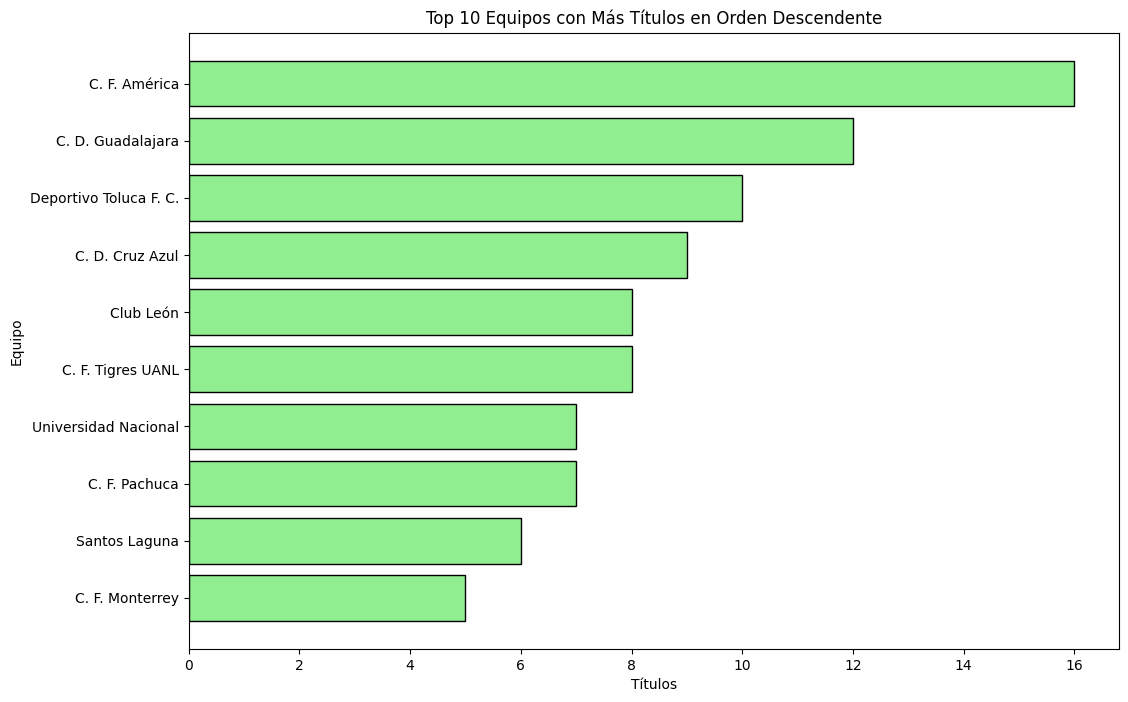

In [49]:
# Gráfico

plt.figure(figsize=(12, 8)) 
plt.barh(campeones_top10['Club'], campeones_top10['Títulos'], color='lightgreen', edgecolor = 'black') 
plt.xlabel('Títulos') 
plt.ylabel('Equipo') 
plt.title('Top 10 Equipos con Más Títulos en Orden Descendente') 
plt.gca().invert_yaxis()
plt.show()

**Obtenga un gráfico de directores técnicos con más títulos en orden ascendente.**

In [50]:
entrenadores = tablas [11]
entrenadores = entrenadores.sort_values(by='Títulos')
entrenadores

,N.º,Entrenador,Títulos,Periodo,Equipos,Campeonatos
7,8,Árpád Fekete,3,1957 - 1990,"Guadalajara (2), Club Oro (1)","1958-59, 1959-60, 1962-63"
10,8,André Jardine,3,2022 -,América (3),"A2023, C2024, A2024"
9,8,Antonio Mohamed,3,2004 -,"Tijuana (1), América (1), Monterrey (1)","A2012, A2014, A2019"
8,8,José Manuel de la Torre,3,2006 -,"Guadalajara (1), Toluca (2)","A2006, A2008, Bicentenario 2010"
6,7,Enrique Meza,4,1982 -,"Toluca (3), Pachuca (1)","V1998, V1999, V2000, C2007"
4,4,Manuel Lapuente,5,1978 - 2013,"Puebla (2), Necaxa (2), América (1)","1982-83, 1989-90, 1994-95, 1995-96, V2002"
3,4,Javier de la Torre,5,1955 - 1984,Guadalajara (5),"1960-61, 1961-62, 1963-64, 1964-65, 1969-70"
5,4,Víctor Manuel Vucetich,5,1990 -,"León (1), Tecos (1), Pachuca (1), Monterrey (2)","1991-92, 1993-94, A2003, A2009, A2010"
2,3,Raúl Cárdenas,6,1966 - 1998,"Cruz Azul (5), América (1)","1968-69, México 1970, 1971-72, 1972-73, 1973-7..."
0,1,Ignacio Trelles,7,1951 - 1991,"Marte (1), Zacatepec (2), Deportivo Toluca (2)...","1953-54, 1954-55, 1957-58, 1966-67, 1967-68, 1..."


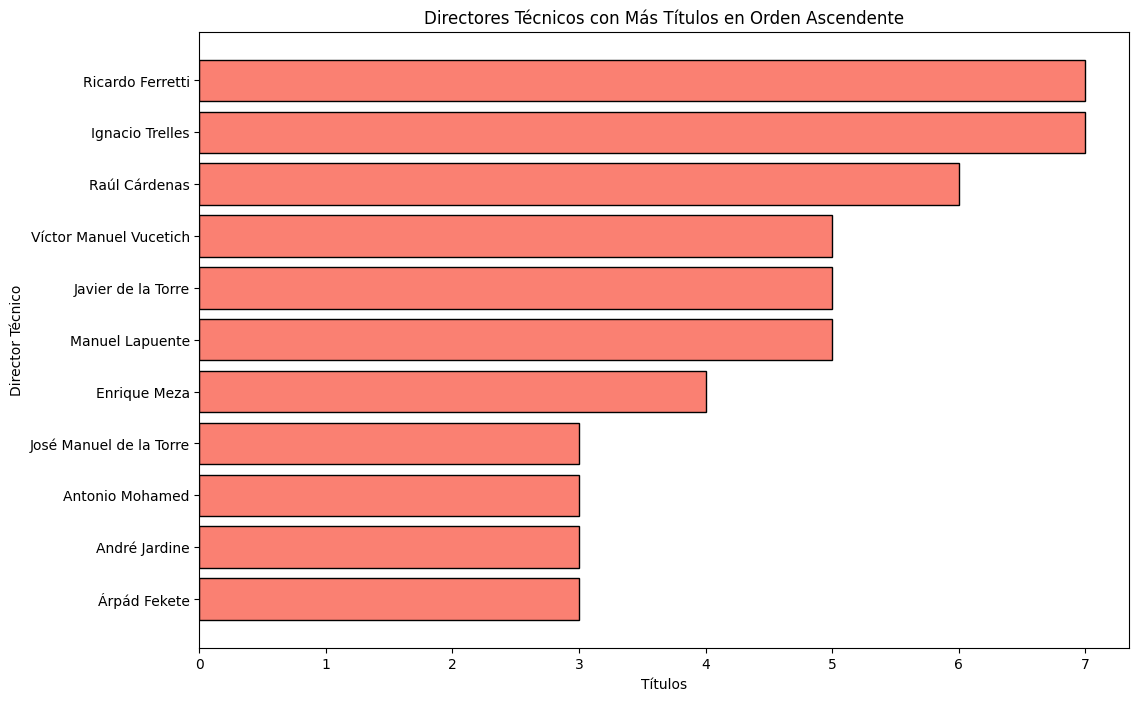

In [53]:
plt.figure(figsize=(12, 8)) 
plt.barh(entrenadores['Entrenador'], entrenadores['Títulos'], color='salmon', edgecolor = 'black') 
plt.xlabel('Títulos') 
plt.ylabel('Director Técnico') 
plt.title('Directores Técnicos con Más Títulos en Orden Ascendente') 
plt.show()

**De la tabla de directores técnicos con más títulos conteste lo siguiente: ¿Cuantos de estos directores técnicos conquistaron un título con Guadalajara? ¿Cuantos de estos directores técnicos conquistaron un título con América? (Utilice variables dummy).**

In [55]:
# Crear variables dummy para Guadalajara y América 
entrenadores_titulos_df['Guadalajara'] = entrenadores['Equipos'].apply(lambda x: 1 if 'Guadalajara' in x else 0) 
entrenadores_titulos_df['América'] = entrenadores['Equipos'].apply(lambda x: 1 if 'América' in x else 0) 

# Contar directores técnicos con títulos en Guadalajara y América 
guadalajara_titulos = entrenadores['Guadalajara'].sum() 
america_titulos = entre['América'].sum() 

print(f'Número de directores técnicos que conquistaron un título con Guadalajara: {guadalajara_titulos}') 
print(f'Número de directores técnicos que conquistaron un título con América: {america_titulos}')

NameError: name 'entrenadores_titulos_df' is not defined